In [1]:
#import datetime as dt
#dt.datetime.strptime(yearmonth, '%Y %B')
#can't use this to find difference in terms of months: "-92 days, 0:00:00" 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#difference expressed in months, for y-axis
class YearMonth:
    def __init__(self, yearmonth):
        months = {
            "January" : 0,
            "February" : 1,
            "March" : 2,
            "April" : 3,
            "May" : 4,
            "June" : 5,
            "July" : 6,
            "August" : 7,
            "September" : 8,
            "October" : 9,
            "November" : 10,
            "December" : 11
        }
        if(pd.isna(yearmonth)):
            self.value = 0;   #self.value = NaN?
        else: 
            inputarray = yearmonth.split(" ")
            self.value = int(inputarray[0])*12 + months[inputarray[1]]
    def __sub__(self, other):
        return self.value - other.value
    def __str__(self):
        months_names = {
            0: "January",
            1: "February",
            2: "March",
            3: "April",
            4: "May",
            5: "June",
            6: "July",
            7: "August",
            8: "September",
            9: "October",
            10: "November",
            11: "December"
        }
        return str(int(self.value/12)) + " " + months_names[self.value % 12]
    def __lt__(self, other):
        return self.value < other.value
    def __le__(self, other):
        return self.value <= other.value
    def __eq__(self, other):
        #if(~isinstance(other, YearMonth)): #print(groupedCounts) #0... why?
        #    return False
        return self.value == other.value
    def __ne__(self, other):
        #if(~isinstance(other, YearMonth)):
        #    return True
        return self.value != other.value
    def __gt__(self, other):
        return self.value > other.value
    def __ge__(self, other):
        return self.value >= other.value
    def __hash__(self):
        return hash(self.value)

#list of Foreigner Indoor/Outdoor Revenue Service positions at Kiaochow in surveyed period
customsData = pd.read_csv("customs research.csv")

#change name strings to my year-month objects
noPromotion = pd.isna(customsData["1 jul 1901, date appointed to present rank"])
promotionsData = customsData[~noPromotion]
dateCols = ["first hired", "1 jul 1901, date appointed to present rank",
            "1 jul 1901, date appointed to job"]
for col in dateCols:
    #A value is trying to be set on a copy of a slice from a DataFrame.
    #Try using .loc[row_indexer,col_indexer] = value instead
    promotionsData.loc[:,col] = promotionsData.loc[:,col].apply(YearMonth)

#A value is trying to be set on a copy of a slice from a DataFrame.
#Try using .loc[row_indexer,col_indexer] = value instead
promotionsData.loc[:,"1901 promotion wait"] = np.subtract(
    promotionsData["1 jul 1901, date appointed to present rank"], promotionsData["first hired"])

axes = sns.jointplot(data = promotionsData, 
        x = "1 jul 1901, date appointed to present rank",
        y = "1901 promotion wait", 
        marker="+",
        #marginal_ticks = True #PathCollection doesn't have these properties?
        #kind='hist', 
        #hue="# employees"
        )
axes.set_axis_labels(xlabel="Date First Hired To Service",
                    ylabel="Length of Career Before Promotion to Current Rank")
plt.show()



C:\Users\boopa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\boopa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


TypeError: float() argument must be a string or a number, not 'YearMonth'

In [ ]:
groupedPromos = promotionsData.groupby(['1901 promotion wait', '1 jul 1901, date appointed to present rank'])
groupedCounts = groupedPromos["name"].nunique()
countTable = groupedCounts.loc[:,:].reset_index().pivot(index='1901 promotion wait', 
    columns='1 jul 1901, date appointed to present rank', values='name')
countTable.fillna(0, inplace=True)
#countTable = countTable.reindex(range(0,24), axis=0, fill_value=0)
#countTable = countTable.reindex(range(0,60), axis=1, fill_value=0).astype(int)

countTable.to_csv("countTable.csv")
print(countTable.head())

fig, ax = plt.subplots()
im = ax.imshow(countTable)

# We want to show all ticks...
#ax.set_xticks(np.arange(len(farmers)))
#ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
#ax.set_xticklabels(farmers)
#ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(1, countTable.index):
#    for j in countTable.keys():
#        text = ax.text(i, j, countTable[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()


#print(customsData.columns) 
    #Index(['name', 'nationality', 'first hired', '1 jul 1901, primary rank',
        #'1 jul 1901, date appointed to present rank',
        #'1 jul 1901, secondary job', '1 jul 1901, date appointed to job',
        #'1 jul 1901, other details', '1 jul 1901, location/last port',
        #'1 jul 1901, on leave?', '1 jul 1905, job', '1 jul 1905, location'],
        #dtype='object')
#print(customsData.head(3))
#print(customsData.tail(5))
#print(customsData.get("1 jul 1901, primary rank").unique())

#filter out all entries with Kiaochow as loc/last port; only way to filter is boolean indexing
#bitwise & | for some reason can do elementwise unification of two bool arrays
#atKiaochowA = (customsData["1 jul 1901, location/last port"] == "Kiaochow")
#atKiaochowB = (promotionsData["1 jul 1901, location/last port"] == "Kiaochow") 
#isSurgeon = customsData["1 jul 1901, primary rank"] == "Surgeon" 
#print(customsData[atKiaochowA])
#print(promotionsData[atKiaochowB])
#print(customsData[atKiaochow].get("1 jul 1901, primary rank").value_counts())




In [43]:
import numpy as np
import matplotlib.pyplot as pl
import scipy as sp
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sb
from scipy.integrate import quad
import math

#takes 4.5 +- 0.5 mins to run sim.test_multidim(30, 10)

#trial 2 change: f 0.1 -> 0.9
#trial 3 change>: f 0.1 -> 0.5
#trial 4 change: mean_false 201 -> 120
#trial 5 change: stdev_false 2 -> 20

class Simulation: 
    #return y position on a normal curve
    def __init__(self):
        self._environment = {
            'mean_real' : 200,
            'mean_false' : 201,
            'stdev_real' : 2,
            'stdev_false' : 2,
            'f' : 0.1}
        self._observer = {
            'mean_real' : 200,
            'mean_false' : 201,
            'stdev_real' : 2,
            'stdev_false' : 2,
            'f' : 0.1}
    
    def test_unidim(self, T = 1000):
        self._graph_env()
        observations, u = self._generate_env(T = 1000)
        c = self._classify(observations)
        Simulation._graph_classifications(observations, c)
        print(Simulation._accuracy_summary(u, c))
    
    def test_multidim(self, max_vector_size = 30, trials_per_size = 10):
        data = np.ndarray((trials_per_size, max_vector_size))

        for vector in np.arange(max_vector_size):
            for trial in np.arange(trials_per_size):
                obs, y_t = self._generate_env(T = 1000, vector_size = vector+1)
                data[trial][vector] = Simulation._acc_rate(y_t, self._classify(obs))
        Simulation._accuracy_summary_multidim(pd.DataFrame(data, columns = np.arange(1, max_vector_size + 1)))

    @staticmethod
    def _rho(o, mean, stddev):
	    return np.exp(-(o-mean)**2/(2*stddev**2))/np.sqrt(2*np.pi*stddev**2)
    
    def set_environment(self, newenv):
        self._environment = newenv
    def set_observer(self, newobs):
        self._observer = newobs

    def _graph_env(self):
        # np.linspace defines x axis of line graph; 1000 means 1000 intervals (resolution of plot); 190-210 or 150-250
        means = (self._environment["mean_real"], self._environment["mean_false"])
        stdevs = (self._environment["stdev_real"], self._environment["stdev_false"])
        
        xmin = np.amin(means) - 5*np.amax(stdevs)
        xmax = np.amax(means) + 5*np.amax(stdevs)

        os = np.linspace(xmin,xmax,1000)
        # creates placeholder array of zeros to hold y axs values
        phirs = np.zeros(len(os))
        phifs = np.zeros(len(os))
        # fill out y values; no need for brackets, just tabs?
        for t in range(len(os)):
	        phirs[t] = Simulation._rho(os[t], means[0], stdevs[0])
	        phifs[t] = Simulation._rho(os[t], means[1], stdevs[1])

        stylesheet1 = {
            "axes.labelsize" : 26,
            "xtick.labelsize" : 26,
            "ytick.labelsize" : 26,
            "figure.figsize" : (9, 5),
            'font.family' : 'serif',
        }

        with pl.style.context(stylesheet1):
            pl.plot(os,phirs, label = "PDF, real observations")
            pl.plot(os,phifs, label = "PDF, false observations")
        pl.locator_params(axis='y', nbins=6)
        #pl.legend(loc = "best")
        pl.ylabel("Probability density")
        pl.xlabel ("Observations (ot)")
        pl.show()

    def _generate_env(self, T, vector_size=1):
        # 1. Randomly decide if we are hallucinating or not
        # 2. If hallucinating, draw an observation from a normal distribution specified by phi_false
        # 3. If not, draw an observation from a normal distribution specified by phi_real
        # 4. add this observation to the list of observations.
        observations = np.ndarray((T, vector_size))

        # choose if we are hallucinating or not
        u = np.random.binomial(n=1, p=self._environment["f"], size=T)
        for t in np.arange(T): 
            # do an if statement to "case it out"
            if u[t]==0:
                # draw from real()
                for v in np.arange(vector_size):
                    o = np.random.normal(self._environment["mean_real"],self._environment["stdev_real"])
                    observations[t][v] = o
            else:
                # draw from false
                for v in np.arange(vector_size):
                    o = np.random.normal(self._environment["mean_false"],self._environment["stdev_false"])
                    observations[t][v] = o
        return observations, u #observations is array of 1000 rows, 30 columns, if T = 1000 and vector size = 30
    
    @staticmethod
    def _graph_observations(observations):
        pl.hist(observations, 100)
        pl.xlabel("Observations (ot)")
        pl.ylabel("Frequency")
    
    def _classify(self, observations):
        
        results = np.ndarray((1000,), dtype = np.bool) #array filled w/ junk values
        mean_real = self._observer["mean_real"]
        stdev_real = self._observer["stdev_real"] 
        mean_false = self._observer["mean_false"]
        stdev_false = self._observer["stdev_false"]  
        f = self._observer["f"] 

        #calculating L; L starts as ratio of priors, then ratio of likelihoods for each vector component
        for vector in np.arange(observations.shape[0]):
            L = (1-f)/f
            for component in np.arange(observations.shape[1]):
                L *= ( Simulation._rho(observations[vector][component],mean_real,stdev_real) / Simulation._rho(observations[vector][component],mean_false,stdev_false) )
            results[vector] = (L>1)
        return results #should be 1 row, 1000 col array of bools

    @staticmethod
    def _acc_rate(y_true, y_pred):
        #accuracy_score(y_true, y_pred) this method takes observations for y_true, classificatons for y_pred
        foo = accuracy_score(y_true, y_pred, normalize=False)
        return 100-(100*foo/1000)
        #foo is the inverse of what it should be: u_real represented as 0, while c_real represented as True; accuracy counts discrepancies of u, c
    
    @staticmethod
    def _accuracy_summary(u, c) :
        print("actually real: ",len(u[u==0])," classified as real: ",len(c[c==1]))
        print("accuracy rate: ", Simulation._acc_rate(u, c))

        #true positive
        cr = u[c] #list of u for which corresponding index in c holds True
        ur_cr  = cr[cr == 0]
        print("true positive rate: ", len(ur_cr)/len(u[u == 0]) )
        
        #false positive
        cr = u[c]
        #print(len(cr))
        uf_cr  = cr[cr == 1]
        print("false positive rate: ", len(uf_cr)/len(u[u == 1]) )

        #false negative
        cf = u[~c]
        ur_cf  = cf[cf == 0]
        print("false negative rate: ", len(ur_cf)/len(u[u == 0]) )
    
    @staticmethod
    def _graph_classifications(observations, c):

        obs_real = observations[c]
        obs_false = observations[~c] 

        stylesheet2 = {
            #"axes.titlesize" : 24,
            "axes.labelsize" : 26,
            #lines.linewidth : 3,
            #"lines.markersize" : 10,
            "xtick.labelsize" : 26,
            "ytick.labelsize" : 26,
            "figure.figsize" : (9, 5),
            'font.family' : 'serif',
            #'font.weight' : 50,
            #'font.serif' : ['Times New Roman'],
        }

        if len(obs_real) != 0:
            intervals_r = round(100*(np.ptp(obs_real)/np.ptp(observations)))
            with pl.style.context(stylesheet2):
                pl.hist(obs_real,intervals_r, label="Observations classified as real")    
        if len(obs_false) != 0:
            intervals_f = round(100*(np.ptp(obs_false)/np.ptp(observations)))
            with pl.style.context(stylesheet2):
                pl.hist(obs_false,intervals_f, label="Observations classified as hallucinations", color = 'orange')

        #pl.legend(loc="best")
        pl.ylabel("Frequency")
        pl.xlabel("Observations (ot)")
    
    @staticmethod
    def _accuracy_summary_multidim(data):
        stylesheet3 = {
            #"axes.titlesize" : 24,
            "axes.labelsize" : 20,
            #lines.linewidth : 3,
            #"lines.markersize" : 10,
            "xtick.labelsize" : 20,
            "ytick.labelsize" : 20,
            "figure.figsize" : (8.5, 5),
            'font.family' : 'serif',
            #'font.weight' : 50,
            #'font.serif' : ['Times New Roman'],
        }
        with pl.style.context(stylesheet3):
            axes = sb.boxplot(data=data)
        if len(axes.get_xticklabels()) > 15:
            for ind, label in enumerate(axes.get_xticklabels()):
                if ind % 2 == 1:  # every odd-index label (these labels are even #s though) is kept
                    label.set_visible(True)
                else:
                    label.set_visible(False)
        axes.set(xlabel='Vector Size', ylabel='Accuracy Rate')

#kullback leibler divergence; measure of difference between 2 distributions (but here i have 3... and i get negative results, when KL divergence is supposed to be non-negative...)
    def divergence_metric(self):

        xs = np.linspace(150,250,1000)
        yrs = np.zeros(len(xs))
        yfs = np.zeros(len(xs))

        def integrand_r(o):
            exp1 = Simulation._rho(o, self._environment["mean_real"], self._environment["stdev_real"])
            exp2 = Simulation._rho(o, self._observer["mean_real"], self._observer["stdev_real"])
            exp3 = Simulation._rho(o, self._observer["mean_false"], self._observer["stdev_false"])
            return exp1*(math.log(exp2/exp3))
        def integrand_f(o):
            exp1 = Simulation._rho(o, self._environment["mean_false"], self._environment["stdev_false"])
            exp2 = Simulation._rho(o, self._observer["mean_false"], self._observer["stdev_false"])
            exp3 = Simulation._rho(o, self._observer["mean_real"], self._observer["stdev_real"])
            return exp1*(math.log(exp2/exp3))
        #def integrand_f(o):
            #return Simulatrho_false(o,mean_false,stdev_false)*(math.log(rho_false(o, mean_f_wrong, stdev_f_wrong)/rho_real(o, mean_r_wrong, stdev_r_wrong)))

        for t in range(len(xs)):
            yrs[t] = integrand_r(xs[t])
            yfs[t] = integrand_f(xs[t])

        # see what the integrand function even is; can't let the domain extend too far in either direction (<100 or i get a domain error; at some point, something changes?
        pl.plot(xs,yrs)
        pl.plot(xs,yfs)
        pl.xlabel ("Observations (ot)")
        pl.show()

        answer, error = quad(integrand_r, 180, 220)
        i1, i2 = quad(integrand_f, 180, 220)
        #answer, error = quad(integrand, -1*(math.inf), math.inf)

        print(answer, error)
        print(i1, 12)

sim = Simulation()


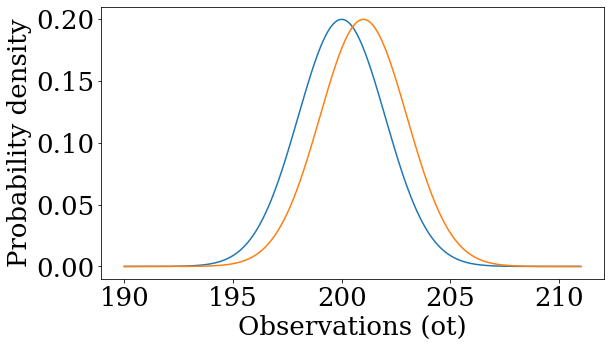

actually real:  508  classified as real:  530
accuracy rate:  61.4
true positive rate:  0.6417322834645669
false positive rate:  0.4146341463414634
false negative rate:  0.35826771653543305
None


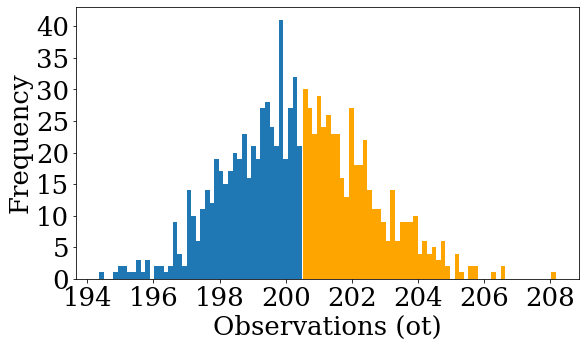

In [44]:
common_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.5}
sim.set_environment(common_properties)
sim.set_observer(common_properties)
sim.test_unidim()

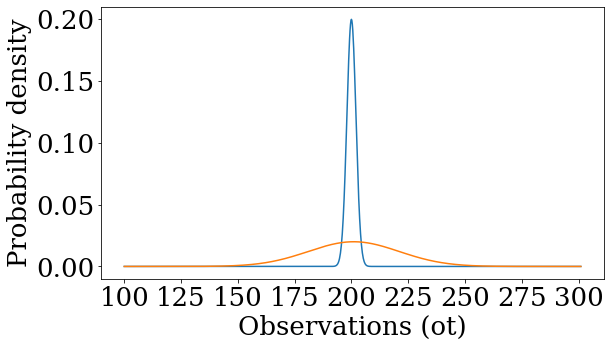

actually real:  909  classified as real:  938
accuracy rate:  96.7
true positive rate:  0.9977997799779978
false positive rate:  0.34065934065934067
false negative rate:  0.0022002200220022
None


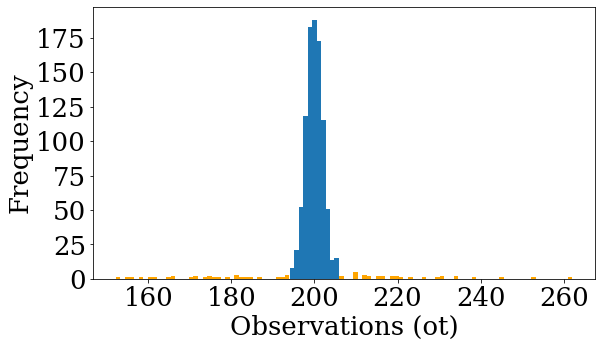

In [45]:
common_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 20,
    'f' : 0.1}
sim.set_environment(common_properties)
sim.set_observer(common_properties)
sim.test_unidim()

In [46]:
common_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
sim.set_environment(common_properties)
sim.set_observer(common_properties)
sim.test_multidim(30, 10)

KeyboardInterrupt: 

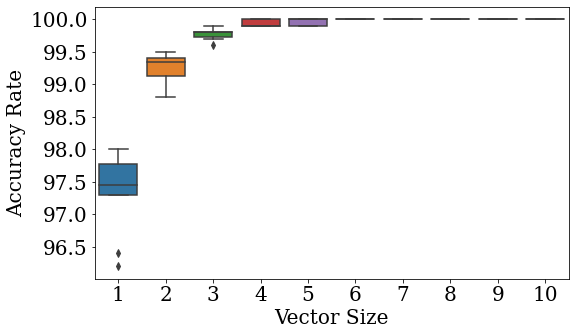

In [49]:
common_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 20,
    'f' : 0.1}
sim.set_environment(common_properties)
sim.set_observer(common_properties)
sim.test_multidim(10, 10)

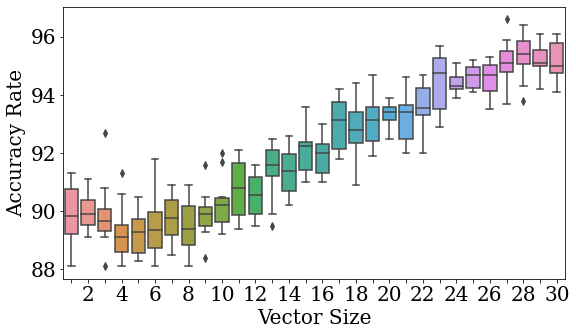

In [43]:
environment_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
observer_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.2}
sim.set_environment(environment_properties)
sim.set_observer(observer_properties)
sim.test_multidim(30, 10)

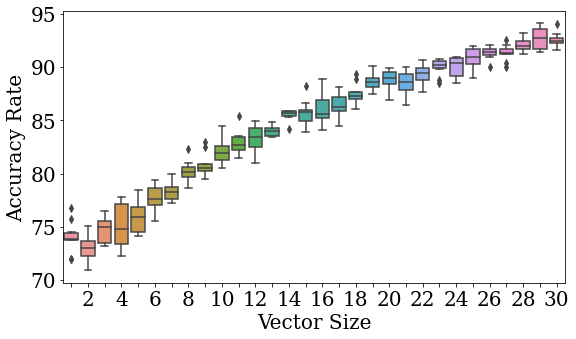

In [44]:
environment_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
observer_properties = {
    'mean_real' : 196,
    'mean_false' : 205,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
sim.set_environment(environment_properties)
sim.set_observer(observer_properties)
sim.test_multidim(30, 10)

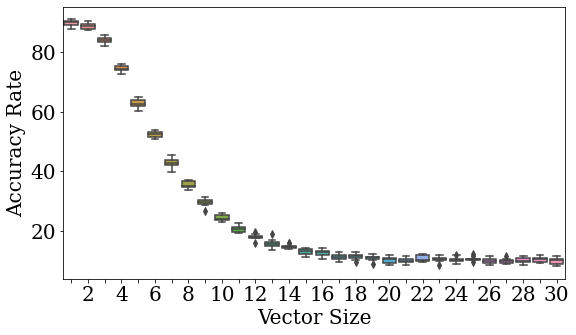

In [45]:
environment_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
observer_properties = {
    'mean_real' : 198,
    'mean_false' : 199,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
sim.set_environment(environment_properties)
sim.set_observer(observer_properties)
sim.test_multidim(30, 10)

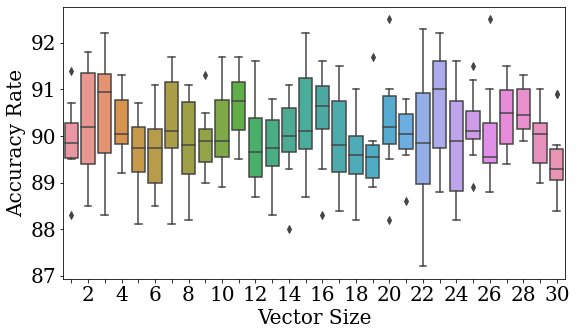

In [46]:
environment_properties = {
    'mean_real' : 200,
    'mean_false' : 201,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.1}
observer_properties = {
    'mean_real' : 202,
    'mean_false' : 203,
    'stdev_real' : 2,
    'stdev_false' : 2,
    'f' : 0.2}
sim.set_environment(environment_properties)
sim.set_observer(observer_properties)
sim.test_multidim(30, 10)